In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [230]:
data_path = '../data/'

xlss1 = 'PINWR_JAN2020_BioCnts.xlsx'
xlss2 = 'PINWR_APR2020_BioCnts.xlsx'

### Begin by importing the spreadsheets and doing some initial data wrangling:

In [163]:
jan_df = pd.read_excel(data_path+xlss1)
apr_df = pd.read_excel(data_path+xlss2)

# change column names for plot appearance:
new_column_names = {'ghost_crab_cnt':'Ghost Crabs',
                    'sm_mole_crab_cnt':'Mole Crabs (sm)',
                    'md_mole_crab_cnt':'Mole Crabs (med)',
                    'lg_mole_crab_cnt':'Mole Crabs (lg)',
                    'coquina_cnt':'Coquina Clams',
                   'worm_cnt':'Polychaete Worms',
                    'amphipod_cnt':'Amphipods'}

jan_df.rename(new_column_names, axis=1, inplace=True)
apr_df.rename(new_column_names, axis=1, inplace=True)

# aggregate data by summing on transect ID (this aggregates the 3 repetition sampling)
january = jan_df.groupby(['transect_ID'], as_index=False).sum()
april = apr_df.groupby(['transect_ID'], as_index=False).sum()

# now, we'll combine the mole crabs (we don't need the size discrimination at this point):
january['Mole Crabs'] = january['Mole Crabs (sm)'] \
                      + january['Mole Crabs (med)']\
                      + january['Mole Crabs (lg)']
        
april['Mole Crabs'] = april['Mole Crabs (sm)'] \
                      + april['Mole Crabs (med)'] \
                      + april['Mole Crabs (lg)']

january.drop(['Mole Crabs (sm)','Mole Crabs (med)','Mole Crabs (lg)'], axis=1, inplace=True)
april.drop(['Mole Crabs (sm)','Mole Crabs (med)','Mole Crabs (lg)'], axis=1, inplace=True)


# next, we'll aggregate on transect samples to combine (sum) S1-S3 into one record:
## create and populate new group column (field) based on transect id type (e.g., control or transect):
january.loc[january['transect_ID'].str[0] == 'C', 'group'] ='control'
january.loc[january['transect_ID'].str[0] =='T', 'group'] = 'treatment'

april.loc[april['transect_ID'].str[0] == 'C', 'group'] ='control'
april.loc[april['transect_ID'].str[0] =='T', 'group'] = 'treatment'

# add survey column:
january['survey'] = 'January 2020'
april['survey'] = 'April 2020'


### Append (vstack) the two dataframes into one:

makes it easier to do plotting.

In [ ]:
df = january.append(april, ignore_index=True)

### Plot species counts by survey:

In [192]:
survey = df.groupby(['survey'], sort=False).sum()

In [193]:
survey = survey.transpose(copy=True)

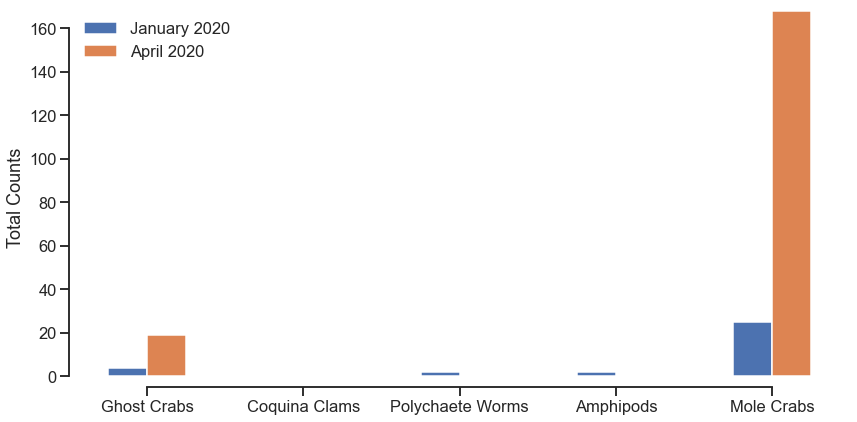

In [194]:
fig00 = plt.figure(figsize=(14,7))
ax00 = fig00.add_subplot(1,1,1)

sns.set(style='ticks')
sns.set_context('talk')

survey.plot(kind='bar', ax=ax00)
plt.ylim(-5, 170)
plt.xticks(rotation=0)
sns.despine(trim=True)

plt.ylabel('Total Counts')
plt.legend(loc='upper left', frameon=False)

plt.savefig('./Counts_by_species_by_survey.jpg', dpi=300)

### Plot species counts by survey by transect type:

In [195]:
survey = df.groupby(['survey'], sort=False).sum()

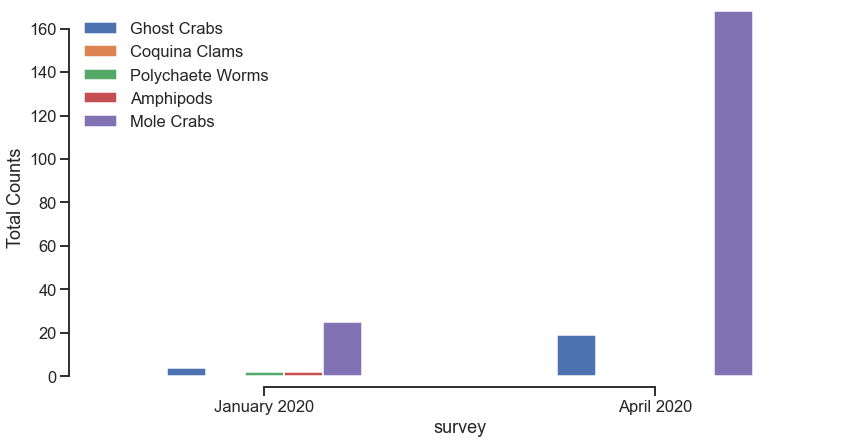

In [196]:
fig01 = plt.figure(figsize=(14,7))
ax00 = fig01.add_subplot(1,1,1)

sns.set(style='ticks')
sns.set_context('talk')

survey.plot(kind='bar', ax=ax00)
plt.ylim(-5, 170)
plt.xticks(rotation=0)
sns.despine(trim=True)

plt.ylabel('Total Counts')
plt.legend(loc='upper left', frameon=False)

plt.savefig('./Counts_by_survey_by_species.jpg', dpi=300)

### Plot by species type by transect type:

In [214]:
january_group = january.groupby(['group'], sort=False).sum()
april_group = april.groupby(['group'], sort=False).sum()
#january_group

In [215]:
january_group = january_group.transpose(copy=True)
april_group = april_group.transpose(copy=True)
#january_group

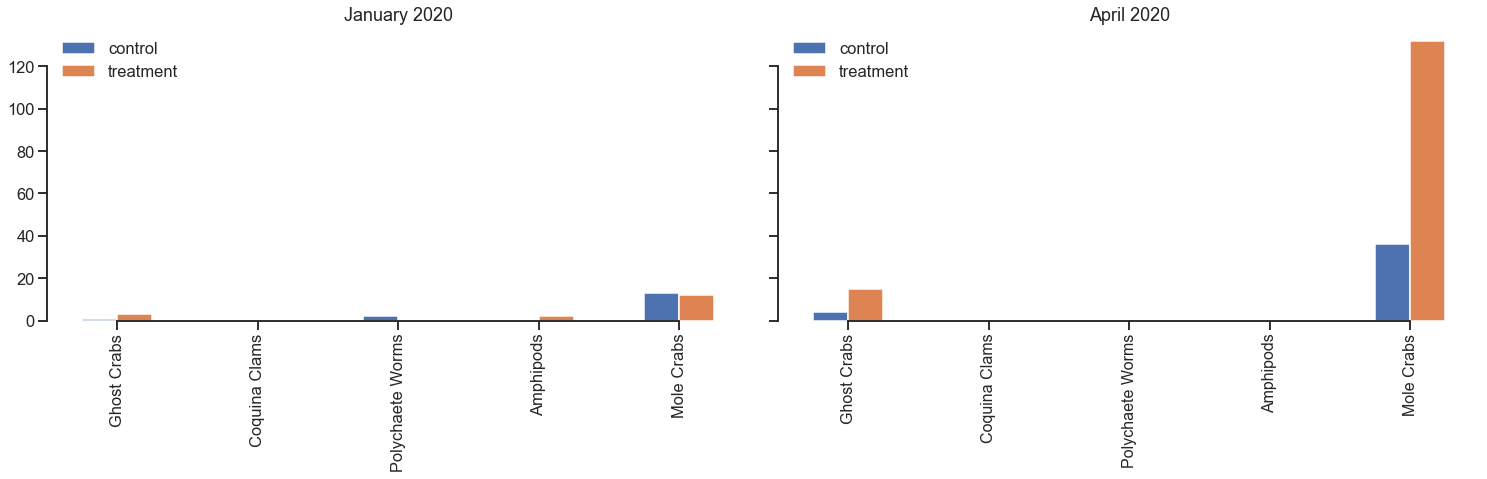

In [228]:
#fig02 = plt.figure(figsize=(21,7))
#ax00 = fig02.add_subplot(1,2,1)
#ax01 = fig02.add_subplot(1,2,2, sharex=ax00)

fig02, (ax00, ax01) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(21,7))

sns.set(style='ticks')
sns.set_context('talk')

january_group.plot(kind='bar', ax=ax00)
april_group.plot(kind='bar', ax=ax01)

plt.xticks(fontsize=16, rotation=90)
sns.despine(trim=True)

plt.ylabel('Total Counts')

ax00.legend(loc='upper left', frameon=False)
ax01.legend(loc='upper left', frameon=False)

ax00.set_title('January 2020')
ax01.set_title('April 2020')
plt.tight_layout()

plt.savefig('./Counts_by_species_by_transect_group.jpg', dpi=300)

### Spare bits and parts...

In [20]:
X = ['Ghost Crabs','Mole Crabs (sm)','Mole Crabs (med)','Mole Crabs (lg)',
                    'Coquina Clams','Polychaete Worms','Amphipods']


jan_df[jan_df['transect_ID'].str.contains('C') ]

,sheet_code,transect_ID,sample_ID,ghost_crab_cnt,sm_mole_crab_cnt,md_mole_crab_cnt,lg_mole_crab_cnt,coquina_cnt,worm_cnt,amphipod_cnt
0,jan2020_C01_B1,C01,B1,0,0,1,0,0,0,0
1,jan2020_C01_B2,C01,B2,0,0,0,0,0,0,0
2,jan2020_C01_B3,C01,B3,0,0,0,0,0,0,0
3,jan2020_C02_B1,C02,B1,0,0,0,0,0,0,0
4,jan2020_C02_B2,C02,B2,0,0,0,0,0,0,0
5,jan2020_C02_B3,C02,B3,0,0,0,0,0,0,0
6,jan2020_C03_B1,C03,B1,0,0,0,0,0,0,0
7,jan2020_C03_B2,C03,B2,0,0,0,0,0,0,0
8,jan2020_C03_B3,C03,B3,0,0,0,0,0,0,0
9,jan2020_C04_B1,C04,B1,0,0,0,0,0,0,0
